In [39]:
#!/usr/bin/python
"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    


import sys
import pickle
from time import time
sys.path.append("../../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../../final_project/final_project_dataset_modified.pkl", "r") )

%matplotlib inline

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
#features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"


In [40]:
## Linear Regression 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

## Training
start = time()
reg.fit(feature_train, target_train)
print round( time() - start, 3) , "s"


0.001 s


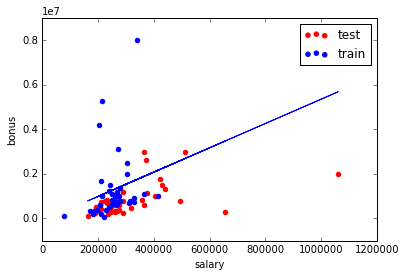

In [41]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

## outlier preview hack ##
# reg.fit(feature_test, target_test)
# plt.plot(feature_train, reg.predict(feature_train), color="b") 
####################

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


In [42]:
## Model Parameters and scoring
print "Slope:      ", reg.coef_[0]
print "Intercept: ", reg.intercept_
print "-------------------"
print "R^2 score on training set: ", reg.score(feature_train, target_train)
print "R^2 score on the test set: ", reg.score(feature_test, target_test)

Slope:       5.44814028881
Intercept:  -102360.543294
-------------------
R^2 score on training set:  0.0455091926995
R^2 score on the test set:  -1.48499241737
